# Multiple Linear Regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the dataset. The dataset used is from ML course of Andrew Ng

In [2]:
Dataframe = pd.read_csv(r"./MultipleLinearRegression.txt")

In [5]:
Dataframe.describe()

,size of House(in sq.feet),Number of Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Plot the realation between all the variables(input & output). This helps in determining the features which are most discriminant feature relation with output or variables

In [6]:
def plot_fn(x1,x2,x1start,x1stop,x1step,x2start,x2stop,x2step,xlabel,ylabel,title):
    plt.scatter(x1,x2,c='r',marker='x')
    plt.xticks(np.arange(x1start,x1stop,x1step))
    plt.yticks(np.arange(x2start,x2stop,x2step))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

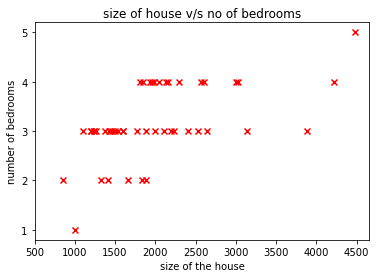

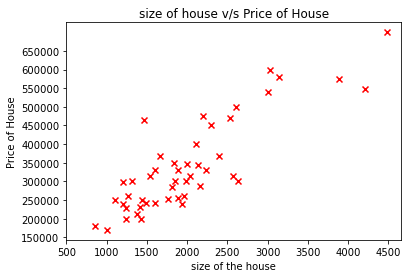

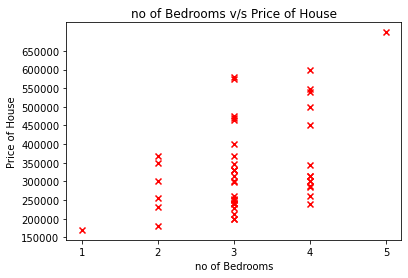

In [7]:
dataset = Dataframe.values
y = dataset[:,-1]
m = len(y)
no_of_independent_var = (dataset.shape[1]-1)
X = dataset[:,:no_of_independent_var]
X = X.reshape(m,no_of_independent_var)
y = y.reshape(m,1)
plot_fn(X[:,0],X[:,1],500,5000,500,1,6,1,xlabel="size of the house",ylabel="number of bedrooms",\
        title="size of house v/s no of bedrooms")
plot_fn(X[:,0],y,500,5000,500,150000,700000,50000,xlabel="size of the house",ylabel="Price of House",\
        title="size of house v/s Price of House")
plot_fn(X[:,1],y,1,6,1,150000,700000,50000,xlabel="no of Bedrooms",ylabel="Price of House",\
        title="no of Bedrooms v/s Price of House")

Plot how the data varies to see how output varies with output.

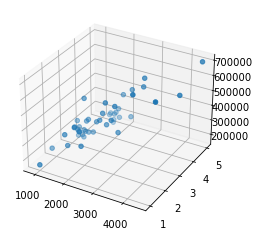

In [8]:
fig = plt.figure()
ax = fig.gca(projection ='3d')

ax.scatter(Dataframe["size of House(in sq.feet)"], Dataframe["Number of Bedrooms"], Dataframe["Price"], label ='y')
#plt.plot()
plt.show()

Standardize the data by subtracting mean and dividing by standard deviation of data

In [9]:
def Standardize_Data(X):
    X_mean = np.mean(X,axis=0)
    X_std = np.std(X,axis=0)
    X = (X-X_mean)/X_std
    return X

In [10]:
X = Standardize_Data(X)

Initialize the paramteres like weights and Inputs(appending bias field of all one's)

In [11]:
def Initialize_parameters(output_y,input_x,no_of_samples,no_of_independent_var):
    weights = np.zeros((no_of_independent_var+1,1))
    input_x = np.append(np.ones((no_of_samples,1)),input_x,axis=1)
    return weights,input_x

In [12]:
weights,X = Initialize_parameters(y,X,m,no_of_independent_var)
weights.shape,X.shape

((3, 1), (47, 3))

## Compute Hypothesis

In [13]:
def Compute_hypothesis(weights,input_x):
    y_hat = np.dot(input_x,weights)
    return y_hat

## Compute Cost function

In [14]:
def Compute_Cost(weights,input_x,output_y,length):
    y_hat = Compute_hypothesis(weights,input_x)
    mse = (1/(2*length))*np.sum((y_hat - output_y)**2)
    return mse

## Compute Gradient Descent

In [15]:
def Gradient_Descent(num_iterations,J,weights,input_x,alpha,length,output_y):
    for i in range(1,num_iterations+1):
        y_hat = Compute_hypothesis(weights,input_x)
        descent_direction = np.dot(input_x.transpose(),(y_hat - output_y))
        step_length = (alpha/length)*descent_direction
        weights -= step_length
        J.append(Compute_Cost(weights,input_x,output_y,length))
    return weights,J

## Linear Regression with Multiple Variables

In [16]:
def LinearRegressionWithMultipleVariable(num_iterations,J):
    alpha = 0.03
    length = m
    theta, J = Gradient_Descent(num_iterations,J,weights,X,alpha,length,y)
    return theta,J

In [17]:
num_iterations = 5000
J = []
final_weights,cost_array = LinearRegressionWithMultipleVariable(num_iterations,J)

In [18]:
final_weights

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

Check if cost reduces with iterations

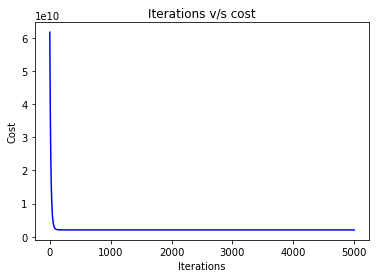

In [19]:
iterations = [i for i in range(1,num_iterations +1)]
plt.plot(iterations,cost_array,c="blue")
plt.title("Iterations v/s cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# Normal Equation

In [20]:
input_xnrml,output_ynrml = dataset[:,:no_of_independent_var],dataset[:,-1]
input_xnrml = input_xnrml.reshape(m,no_of_independent_var)
output_ynrml = output_ynrml.reshape(m,1)
input_xnrml = np.append(np.ones((len(output_ynrml),1)),input_xnrml, axis=1)
weight_nrml = np.dot(np.dot(np.linalg.inv(np.dot(input_xnrml.T,input_xnrml)),input_xnrml.T),output_ynrml)

In [21]:
print("Weights from Normal Equation:","\n",weight_nrml)
print("Weights from Gradient Descent:","\n",final_weights)

Weights from Normal Equation: 
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
Weights from Gradient Descent: 
 [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


# Multiple Linear Regression using Sklearn Library

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
Input = Dataframe[["size of House(in sq.feet)","Number of Bedrooms"]]
Output = Dataframe["Price"]

In [24]:
reg_model = LinearRegression().fit(Input,Output)

In [25]:
reg_model.coef_,reg_model.intercept_

(array([  139.21067402, -8738.01911233]), 89597.90954279748)

In [26]:
weights = np.zeros((no_of_independent_var+1,1))
weights[0] = reg_model.intercept_
weights[1] = reg_model.coef_[0]
weights[2] = reg_model.coef_[1]

In [27]:
weights

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [28]:
print("The weights from using inbuilt Linear Regression Model:","\n",weights)
print("Weights from Normal Equation:","\n",weight_nrml)
print("Weights from Gradient Descent:","\n",final_weights)

The weights from using inbuilt Linear Regression Model: 
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
Weights from Normal Equation: 
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
Weights from Gradient Descent: 
 [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
